In [1]:
import quickage
import warnings
warnings.filterwarnings("default")
warnings.filterwarnings("ignore")
import numpy as np
import gala.dynamics as gd
import astropy.coordinates as astro_coord
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
folder='../figures/'
v_sun = astro_coord.CartesianDifferential([11.1, 248., 7.25]*u.km/u.s) #GALAH coordinate system
galcen_frame =astro_coord.Galactocentric(galcen_distance=8.2*u.kpc,
                                    galcen_v_sun=v_sun)

In [3]:
s0 =astro_coord.SkyCoord('20:49:27.44 +33:36:50.9', unit=(u.hourangle, u.deg))

U = 47.16,0.29
V = 21.34,0.43
W = -3.68,0.26
d= 17
s=astro_coord.SkyCoord(ra=s0.ra, dec=s0.dec, distance=d*u.pc)#.transform_to( astro_coord.Galactic)

#this is centered around the sun
c= astro_coord.Galactic(u=np.ones(1000)*s.cartesian.x,
                        v=np.ones(1000)*s.cartesian.y, 
                        w=np.ones(1000)*s.cartesian.z,
                        U=np.random.normal(U[0], U[1], 1000)*u.km/u.s,
                        V=np.random.normal(V[0], V[1], 1000)*u.km/u.s,
                        W=np.random.normal(W[0], W[1], 1000)*u.km/u.s,\
                        representation_type= 'cartesian')
#transform to sky 
cx=c.transform_to(astro_coord.ICRS)

RV=cx.radial_velocity.to(u.km/u.s).value 
mu_alpha_cosdec=(cx.pm_ra_cosdec).to(u.mas/u.yr).value
mu_delta=cx.pm_dec.to(u.mas/u.yr).value

In [4]:
np.nanmedian(RV), np.nanmedian(mu_alpha_cosdec/np.cos(s0.dec.radian)),  np.nanmedian(mu_delta)

(11.30133446497482, 752.8125249593472, -44.38881250352209)

In [5]:
np.nanstd(RV)

0.3427367323510794

In [6]:
sourc={'ra':s0.ra.to(u.degree).value, \
        'dec':s0.dec.to(u.degree).value,\
        'pmra':(np.nanmedian(mu_alpha_cosdec/np.cos(s0.dec.radian)), \
                np.nanstd(mu_alpha_cosdec/np.cos(s0.dec.radian))), 
        'pmdec': (np.nanmedian(mu_delta), np.nanstd(mu_delta)),
       'distance': (17, 0.05), #assume ? what's the uncertainty?
       
        'rv': (np.nanmedian(RV), np.nanstd(RV))}

metal= (0.04, 0.20)

filename=folder+'/toi_j2049'
sourc

{'ra': 312.36433333333326,
 'dec': 33.61413888888889,
 'pmra': (752.8125249593472, 5.222959441973036),
 'pmdec': (-44.38881250352209, 3.8868808663720307),
 'distance': (17, 0.05),
 'rv': (11.30133446497482, 0.3427367323510794)}

[6.40246328 7.02211671]
Age: 6.71 -0.21 +0.21 Gyr


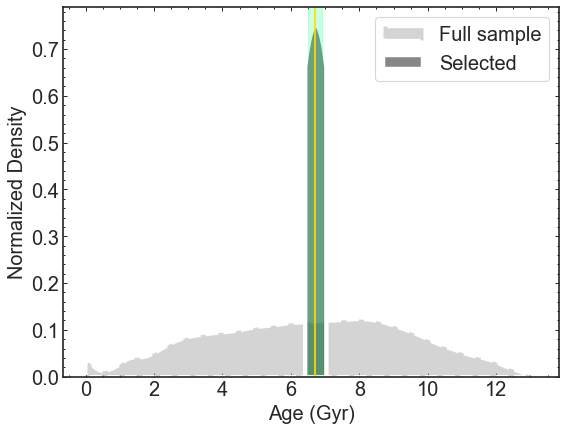

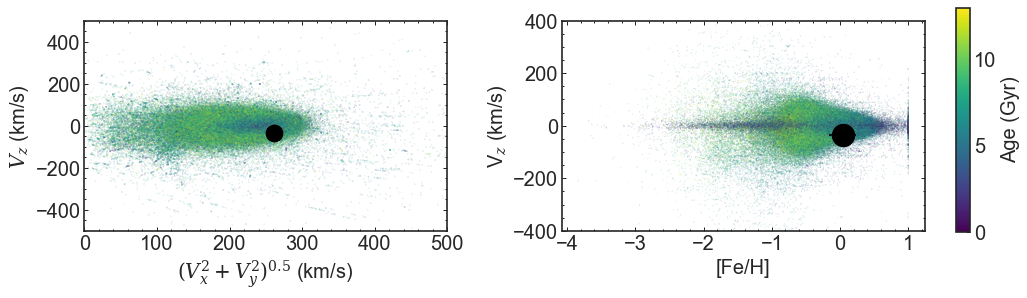

In [7]:
#select stars with 1 sigma of metallicity and velocity within 10 km/s (1-sigma too small)
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'],  volume=100, velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_met1sigma.pdf', cmap='viridis')

In [8]:
#only ~3 stars all ~6 Gyr

[ 6.75764827  7.96110029  5.75669538 11.02788912  6.18622766  4.66009637
  5.74089106  5.27296085  4.78563629  4.68398208  0.01791792  7.12780349
  7.03073672  8.33140805  6.90002227  5.40164795  0.10964782  8.19935651
  7.82873284 10.47263796  2.8794873   4.29227628  6.86683193  4.8454447
  3.41526782  8.0593504   5.53561253  6.60296497  0.01614807 10.50859326
  6.06018503  8.17152977  5.91397861  5.18597799  9.74052434  3.72601102
  5.99674645  4.68145478  2.93287589  8.09713705  9.0982391   8.57851849
  6.29902041  6.63377092  5.88276858  4.28847461  9.40623392  8.21873127
  4.70972215  7.77994661  4.44603292  7.87000299  5.57813245  9.25256494
  6.40246328  7.02211671]
Age: 6.24 -1.83 +2.00 Gyr


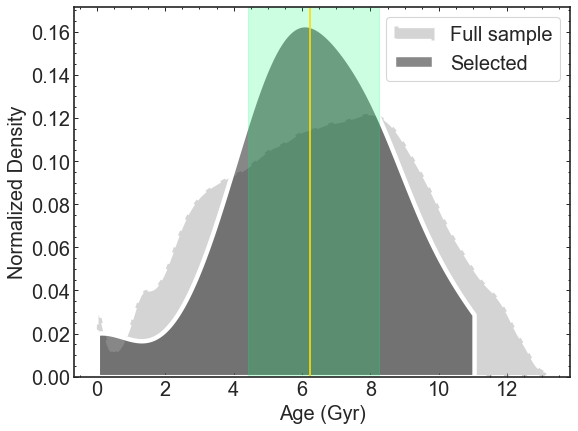

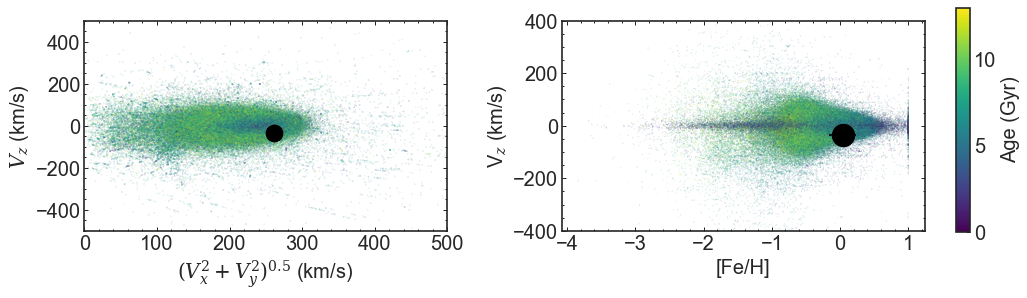

In [9]:
# expanding the volume 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'],  volume=200, velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_d_200pc_met1sigma.pdf', cmap='viridis')

[ 8.06060772  3.59707688  0.03981072  6.42602397  6.75764827  7.96110029
  3.77229042  5.75669538  7.35702903 11.89929978  6.68384132 11.02788912
  6.18622766  4.66009637  8.22053256  5.74089106  7.39330959 11.07080447
  6.24461927  5.27296085 10.43421491 11.04933269  4.78563629  4.68398208
  6.24048879  8.67671708  2.14170488  0.01791792  7.12780349  7.03073672
  8.33140805  3.45973133  7.45104643  6.90002227  5.40164795  0.10964782
  4.50187416  8.19935651  7.29611828  7.82873284 10.47263796  2.8794873
  7.79722194  0.01995262  4.07510815  4.29227628  6.86683193  4.76081706
  4.8454447   9.28017406  6.95272149  3.41526782  8.0593504   6.96083967
  5.53561253  5.5640702   4.95743485  8.00947615  8.69319874  5.06761199
  6.60296497  3.39367672  3.75195338  0.01614807  8.79481396  5.2400043
  8.55008132 10.50859326  6.06018503  0.02511886  8.17152977 10.67868328
  5.89030647  8.4414253   5.91397861  8.27144911  4.21698859 10.49337243
  8.38816107  5.18597799  7.96279823  3.23763681  9.7

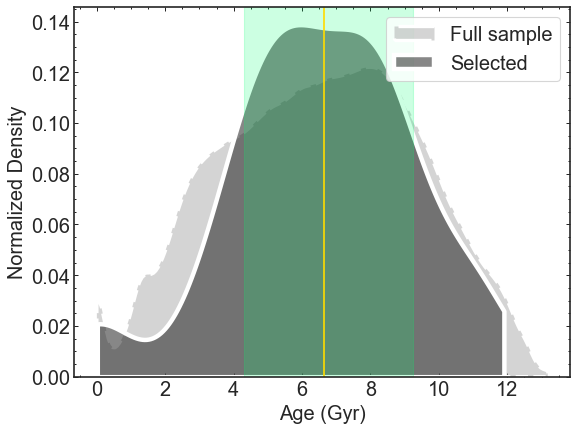

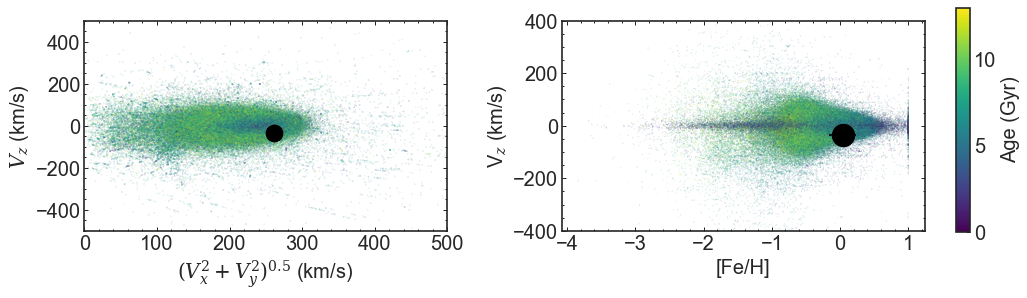

In [10]:
# expanding the volume 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'],  volume=300, velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_d_300pc_met1sigma.pdf', cmap='viridis')

[6.42602397 4.66009637 5.27296085 4.78563629 3.51932465 5.89030647
 5.05939962 5.99674645 4.91005032 4.65151037 6.96672791 3.44438721
 6.30330057 2.73320787 5.57813245]
Age: 5.06 -1.27 +1.17 Gyr


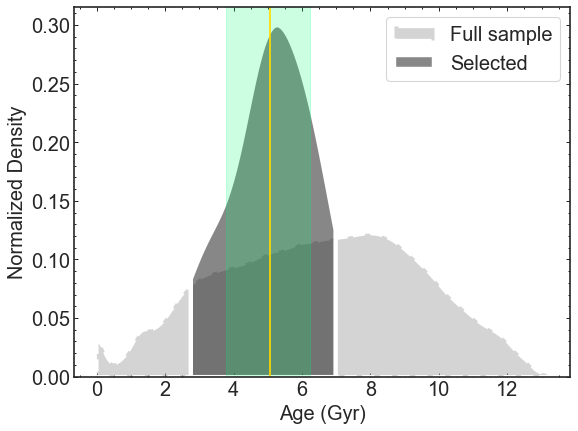

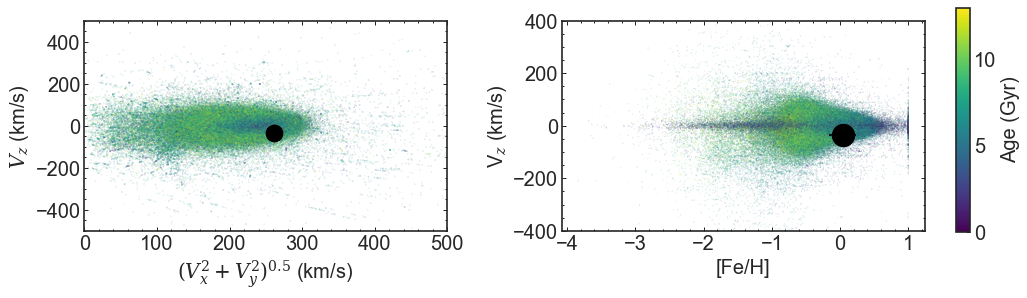

In [11]:
# expanding the volume --> adding < 7 Gyr prior
res=quickage.estimate_age(sourc, metal, nsigma=1,  prior=[0, 7], data_set='galah',\
                          select_by=['metallicity'],  volume=400, velocity_volume=5, plot=True, plot_kde=True,
                          file_plot=filename+'vel_5kms_d_400pc_prior_met1sigma.pdf', cmap='viridis')

In [12]:
import popsims.relations as poprel

In [13]:
poprel.absolute_mag_from_spt(16.5, mag='j', syst='2mass', ref='dupuy2012')

(10.344376760309565, 0.39640090603705064)

In [22]:
#based on Maan relatoons this correponds to radius <0.1 rsun
radius= np.random.uniform(0.0, 0.1, 10000)*u.Rsun
i= np.random.uniform(0, np.pi/2, 10000) #let's say we had the inclination angle
vsini= np.random.normal(4.5, 0.2)*u.km/u.s*np.sin(i)

In [23]:
period= (radius.to(u.km)/(vsini)).to(u.day)

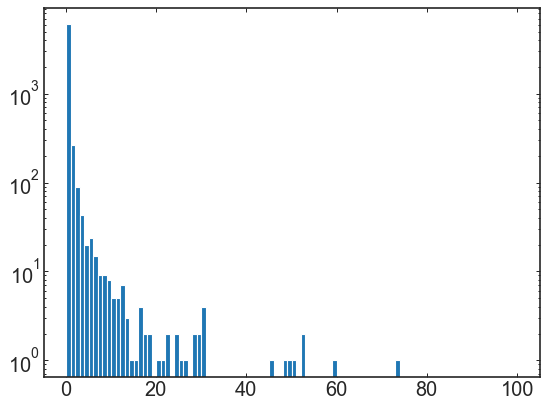

In [24]:
fig, ax=plt.subplots()
_ = ax.hist(period.value, log=True, bins=100, range=[0.1, 100])

In [25]:
#scott engle's relations
def get_age_m4_m7(t):
    if t<25.45:
        return 10**(0.0251*t-0.16)
    else:
        return 10**(0.0251*t-0.16-0.-0.02*(t-25.45))


In [26]:
ages_rot=np.array([get_age_m4_m7(x) for x in period.value])

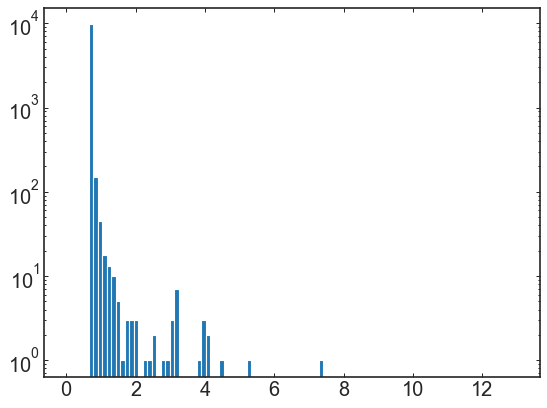

In [27]:
fig, ax=plt.subplots()
_=ax.hist(ages_rot, log=True, range=[0, 13], bins=100)

In [28]:
np.percentile(ages_rot, 16), np.percentile(ages_rot, 84)

(0.6936911824077446, 0.7076495965510013)